In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_3_personal.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               1016 non-null   int64  
 1   dokoncil_semestr         1016 non-null   float64
 2   BI-PA1_znamka            1016 non-null   float64
 3   BI-PA1_poradi_zapisu     1016 non-null   float64
 4   BI-PA1_semestr           1016 non-null   float64
 5   BI-PAI_znamka            1016 non-null   float64
 6   BI-PAI_poradi_zapisu     1016 non-null   float64
 7   BI-PAI_semestr           1016 non-null   float64
 8   BI-CAO_znamka            1016 non-null   float64
 9   BI-CAO_poradi_zapisu     1016 non-null   float64
 10  BI-CAO_semestr           1016 non-null   float64
 11  BI-PS1_znamka            1016 non-null   float64
 12  BI-PS1_poradi_zapisu     1016 non-null   float64
 13  BI-PS1_semestr           1016 non-null   float64
 14  BI-MLO_znamka           

In [4]:
matrix_bak.mean()

studium_id                 1.384693e+07
dokoncil_semestr           9.143701e-01
BI-PA1_znamka              2.185531e+00
BI-PA1_poradi_zapisu       9.429134e-01
BI-PA1_semestr             9.429134e-01
BI-PAI_znamka              2.127953e+00
BI-PAI_poradi_zapisu       9.330709e-01
BI-PAI_semestr             9.330709e-01
BI-CAO_znamka              1.058563e+00
BI-CAO_poradi_zapisu       9.074803e-01
BI-CAO_semestr             9.074803e-01
BI-PS1_znamka              2.251476e+00
BI-PS1_poradi_zapisu       1.007874e+00
BI-PS1_semestr             9.547244e-01
BI-MLO_znamka              1.980315e+00
BI-MLO_poradi_zapisu       9.271654e-01
BI-MLO_semestr             9.271654e-01
BI-ZMA_znamka              2.188484e+00
BI-ZMA_poradi_zapisu       9.478346e-01
BI-ZMA_semestr             9.478346e-01
pocet_kreditu_semestr_1    2.731299e+01
BI-PA2_znamka              2.478346e+00
BI-PA2_semestr             9.311024e-01
BI-PA2_poradi_zapisu       9.311024e-01
BI-DBS_znamka              1.732776e+00


## Příprava datasetu

### Nastavení indexu

In [5]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení target proměnné na nominální

In [6]:
dokoncil_semestr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
matrix_bak['dokoncil_semestr'] = matrix_bak['dokoncil_semestr'].astype(dokoncil_semestr_category)

In [7]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 12948006 to 17939806
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         1016 non-null   category
 1   BI-PA1_znamka            1016 non-null   float64 
 2   BI-PA1_poradi_zapisu     1016 non-null   float64 
 3   BI-PA1_semestr           1016 non-null   float64 
 4   BI-PAI_znamka            1016 non-null   float64 
 5   BI-PAI_poradi_zapisu     1016 non-null   float64 
 6   BI-PAI_semestr           1016 non-null   float64 
 7   BI-CAO_znamka            1016 non-null   float64 
 8   BI-CAO_poradi_zapisu     1016 non-null   float64 
 9   BI-CAO_semestr           1016 non-null   float64 
 10  BI-PS1_znamka            1016 non-null   float64 
 11  BI-PS1_poradi_zapisu     1016 non-null   float64 
 12  BI-PS1_semestr           1016 non-null   float64 
 13  BI-MLO_znamka            1016 non-null   float64 
 1

### Nastavení atributů na kategorické

In [8]:
# ordinální
attr_category = pd.api.types.CategoricalDtype(categories=[0, 1], ordered=False)
# pohlavi_kod
matrix_bak['pohlavi_kod'] = matrix_bak['pohlavi_kod'].astype(attr_category)
# je_cech
matrix_bak['je_cech'] = matrix_bak['je_cech'].astype(attr_category)
# gymnazium
matrix_bak['gymnazium'] = matrix_bak['gymnazium'].astype(attr_category)
# praha
matrix_bak['praha'] = matrix_bak['praha'].astype(attr_category)
# scio
matrix_bak['scio'] = matrix_bak['scio'].astype(attr_category)
# olym
matrix_bak['olym'] = matrix_bak['olym'].astype(attr_category)
# zkouska
matrix_bak['zkouska'] = matrix_bak['zkouska'].astype(attr_category)
# prominuti
matrix_bak['prominuti'] = matrix_bak['prominuti'].astype(attr_category)

In [9]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 12948006 to 17939806
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         1016 non-null   category
 1   BI-PA1_znamka            1016 non-null   float64 
 2   BI-PA1_poradi_zapisu     1016 non-null   float64 
 3   BI-PA1_semestr           1016 non-null   float64 
 4   BI-PAI_znamka            1016 non-null   float64 
 5   BI-PAI_poradi_zapisu     1016 non-null   float64 
 6   BI-PAI_semestr           1016 non-null   float64 
 7   BI-CAO_znamka            1016 non-null   float64 
 8   BI-CAO_poradi_zapisu     1016 non-null   float64 
 9   BI-CAO_semestr           1016 non-null   float64 
 10  BI-PS1_znamka            1016 non-null   float64 
 11  BI-PS1_poradi_zapisu     1016 non-null   float64 
 12  BI-PS1_semestr           1016 non-null   float64 
 13  BI-MLO_znamka            1016 non-null   float64 
 1

## Doplnění NaN hodnot

In [10]:
matrix_bak = matrix_bak.fillna(0)

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [11]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(1016, 43)

(1016,)

trénovací data


(812, 43)

(812,)

testovací data


(204, 43)

(204,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [13]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [14]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [15]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}

0.952594 (+/-0.016428) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.952816 (+/-0.006720) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.950144 (+/-0.010268) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.950769 (+/-0.008969) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.950696 (+/-0.009170) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.952594 (+/-0.016428) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.952816 (+/-0.006720) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.950825 (+/-0.010876) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.946671 (+/-0.016454) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.947223 (+/-0.016271) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [16]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.923645
accuracy score (test): 0.921569


In [17]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
34,datum_zahajeni,0.613790
28,BI-LIN_znamka,0.097706
15,BI-ZMA_znamka,0.088715
12,BI-MLO_znamka,0.072733
1,BI-PA1_poradi_zapisu,0.068841
35,rok_maturity,0.032102
33,je_cech,0.026113
0,BI-PA1_znamka,0.000000
30,BI-LIN_poradi_zapisu,0.000000
25,BI-SAP_znamka,0.000000


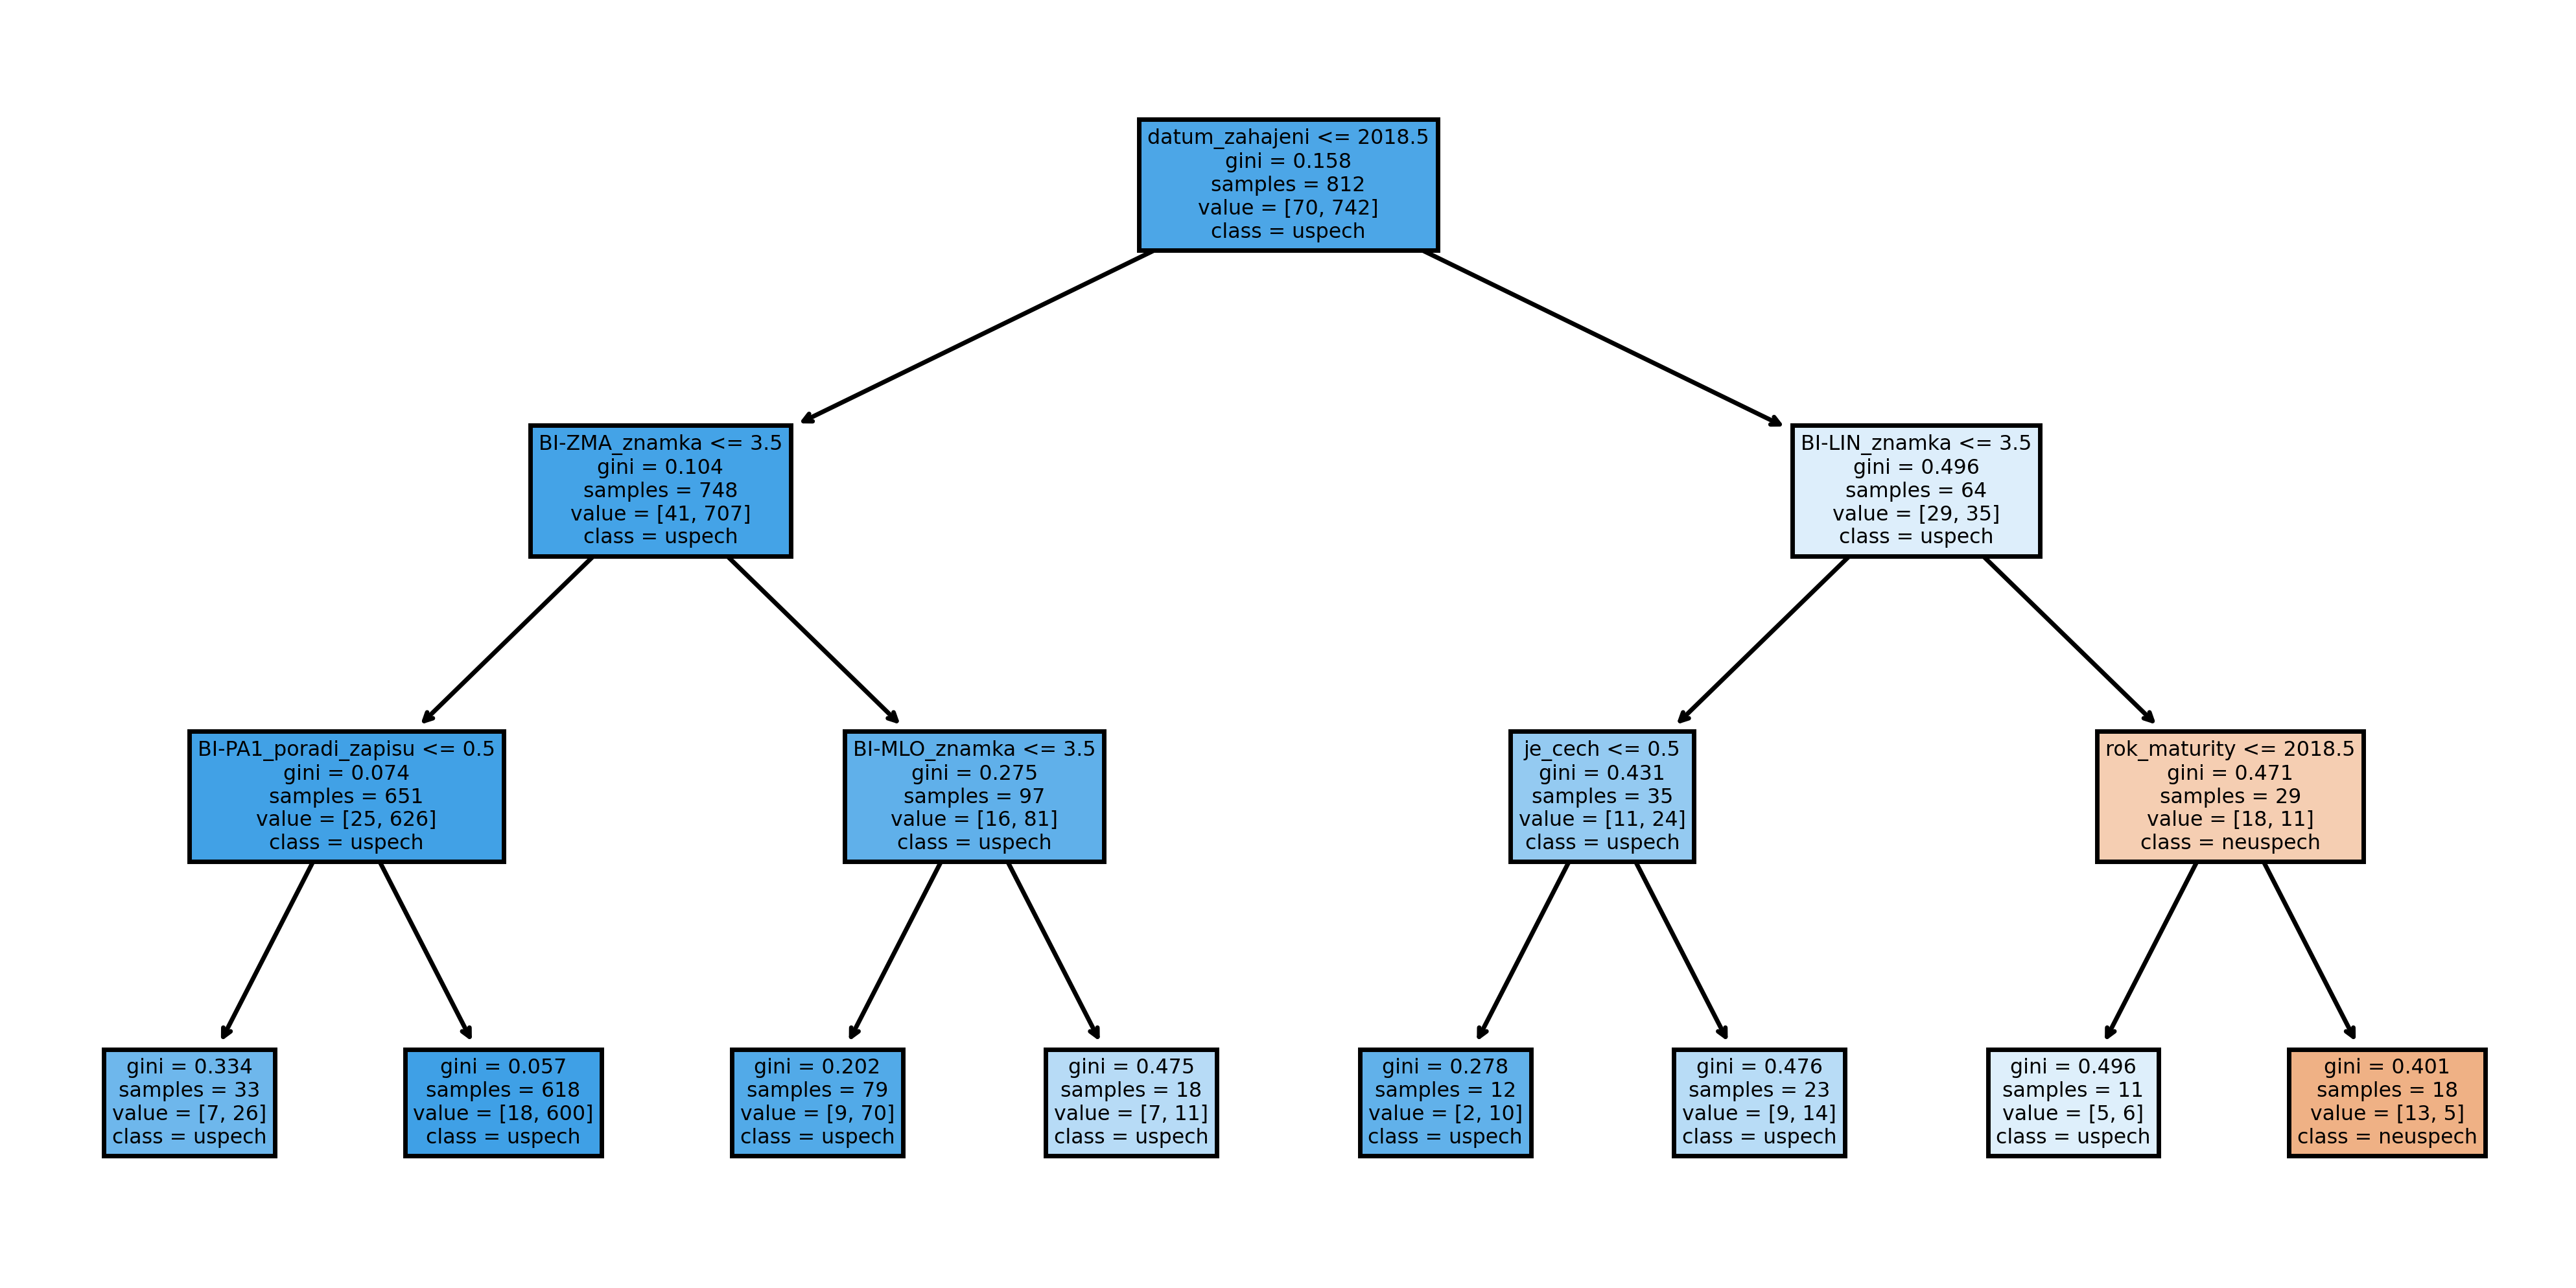

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
fig.savefig('tree_f1_semestr1.png')

#### Random forest

In [19]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [20]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 25}

0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.954955 (+/-0.000284) for {'criterion': 'gini', 'max_depth': 2, 'max_

In [21]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.924877
accuracy score (test): 0.926471


In [22]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
34,datum_zahajeni,0.370193
35,rok_maturity,0.154311
31,pocet_kreditu_semestr_2,0.082334
18,pocet_kreditu_semestr_1,0.079715
28,BI-LIN_znamka,0.066563
15,BI-ZMA_znamka,0.045539
12,BI-MLO_znamka,0.040236
19,BI-PA2_znamka,0.026079
9,BI-PS1_znamka,0.023309
0,BI-PA1_znamka,0.016480


#### Adaboost

In [23]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [24]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.9, 'n_estimators': 10}

0.950473 (+/-0.018043) for {'learning_rate': 0.1, 'n_estimators': 5}
0.954955 (+/-0.000284) for {'learning_rate': 0.1, 'n_estimators': 10}
0.954955 (+/-0.000284) for {'learning_rate': 0.1, 'n_estimators': 15}
0.954955 (+/-0.000284) for {'learning_rate': 0.1, 'n_estimators': 20}
0.956195 (+/-0.004851) for {'learning_rate': 0.1, 'n_estimators': 25}
0.956195 (+/-0.004851) for {'learning_rate': 0.1, 'n_estimators': 30}
0.957427 (+/-0.004550) for {'learning_rate': 0.1, 'n_estimators': 35}
0.958049 (+/-0.005421) for {'learning_rate': 0.1, 'n_estimators': 40}
0.958566 (+/-0.005856) for {'learning_rate': 0.1, 'n_estimators': 45}
0.954955 (+/-0.000284) for {'learning_rate': 0.2, 'n_estimators': 5}
0.954955 (+/-0.000284) for {'learning_rate': 0.2, 'n_estimators': 10}
0.957427 (+/-0.004550) for {'learning_rate': 0.2, 'n_estimators': 15}
0.958049 (+/-0.005421) for {'learning_rate': 0.2, 'n_estimators': 20}
0.957884 (+/-0.00544

In [25]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.928571
accuracy score (test): 0.916667


In [26]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
34,datum_zahajeni,0.2
26,BI-SAP_semestr,0.1
39,scio,0.1
19,BI-PA2_znamka,0.1
18,pocet_kreditu_semestr_1,0.1
35,rok_maturity,0.1
28,BI-LIN_znamka,0.1
15,BI-ZMA_znamka,0.1
31,pocet_kreditu_semestr_2,0.1
0,BI-PA1_znamka,0.0


#### Xgboost

In [27]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [28]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.30000000000000004, 'max_depth': 3}

0.950884 (+/-0.007190) for {'eta': 0.1, 'max_depth': 3}
0.950739 (+/-0.004823) for {'eta': 0.1, 'max_depth': 4}
0.947228 (+/-0.005939) for {'eta': 0.1, 'max_depth': 5}
0.947265 (+/-0.010902) for {'eta': 0.1, 'max_depth': 6}
0.949234 (+/-0.009068) for {'eta': 0.1, 'max_depth': 7}
0.950613 (+/-0.010445) for {'eta': 0.2, 'max_depth': 3}
0.947228 (+/-0.013208) for {'eta': 0.2, 'max_depth': 4}
0.949172 (+/-0.016073) for {'eta': 0.2, 'max_depth': 5}
0.947897 (+/-0.012520) for {'eta': 0.2, 'max_depth': 6}
0.947889 (+/-0.014677) for {'eta': 0.2, 'max_depth': 7}
0.951323 (+/-0.009541) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.948618 (+/-0.006663) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.949871 (+/-0.008648) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.949184 (+/-0.007680) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.947923 (+/-0.015895) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.9471

In [29]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 0.996305
accuracy score XGBoost (val): 0.921569


In [30]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [31]:
feat_imp

pocet_kreditu_semestr_2    88.0
rok_maturity               54.0
pocet_kreditu_semestr_1    54.0
BI-PA1_znamka              45.0
BI-PS1_znamka              38.0
BI-ZMA_znamka              36.0
datum_zahajeni             35.0
BI-DBS_znamka              33.0
BI-SAP_znamka              32.0
BI-PAI_znamka              30.0
BI-PA2_znamka              24.0
BI-LIN_znamka              21.0
BI-MLO_znamka              19.0
gymnazium                  18.0
BI-PS1_poradi_zapisu       13.0
praha                      11.0
pohlavi_kod                10.0
maturita_nastup_rozdil     10.0
je_cech                     9.0
BI-CAO_znamka               7.0
scio                        3.0
BI-PA1_poradi_zapisu        1.0
BI-DBS_semestr              1.0
dtype: float64

#### MLP

In [32]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [33]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.913793
accuracy score mlp (val): 0.916667


#### Lineární regrese

In [34]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [35]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.24132499606363808
RMSE reg (test): 0.23950082373661447


#### kNN

In [36]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [37]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

0.927611 (+/-0.018786) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.927611 (+/-0.018786) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.933785 (+/-0.017364) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.933785 (+/-0.017364) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.916643 (+/-0.019250) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.925943 (+/-0.022888) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.920417 (+/-0.022211) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.932984 (+/-0.016603) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.946858 (+/-0.010899) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.946173 (+/-0.012497) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.942836 (+/-0.014105) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.942777 (+/-0.013909) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.

In [38]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 1.000000
accuracy score knn (val): 0.921569


## Výsledky

In [39]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [40]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

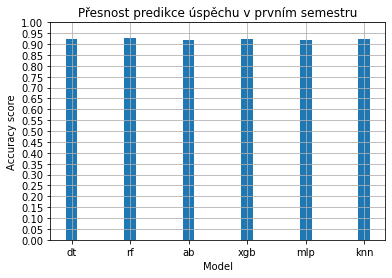

In [41]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [42]:
results

,vysledky
dt,0.922
rf,0.926
ab,0.917
xgb,0.922
mlp,0.917
knn,0.922


### Měřeno f1_score

In [43]:
results_f1 = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

In [44]:
results_f1.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results_f1.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results_f1.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results_f1.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results_f1.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results_f1.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

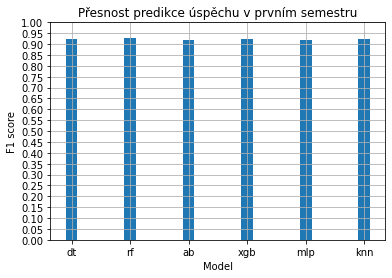

In [45]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results_f1.index, results_f1['vysledky'].values, width)

ax.set_ylabel('F1 score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v prvním semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [46]:
results_f1

,vysledky
dt,0.922
rf,0.926
ab,0.917
xgb,0.922
mlp,0.917
knn,0.922
